<a href="https://colab.research.google.com/github/Fiona-cherutto/Titanic-Machine-Learning/blob/main/Moringa_Data_Science_Core_W9_Independent_Project_2020_07_FIONA_CHERUTTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITANIC

## 1. Defining the Question

### a) Specifying the Data Analytic Question

Predicts using KNN classifier whether passangers survived or did not survive in the titanic shipwreck

### b) Defining the Metric for Success

This project will be successful when: 
*  We accurately predict accurate using KNN classifier that will optimumly predict if a passenger on the titanic survived or not with an accuracy score of above 80%.

### c) Understanding the context 

Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time the deadliest of a single ship in the West and the deadliest peacetime sinking of a superliner or cruise ship to date.

### d) Recording the Experimental Design

For this analysis will follow the following steps below


1.   Loading and previewing data
2.   Data cleanining
3.   EDA
4.   Implimenting the solution
5.   Challenging the solution
6.   Follow up question

### e) Data Relevance

The data provided for the analysis consist of factors that affect the survival of parsengers on board in the titanic.

## 2. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 3. Reading the Data

In [ ]:
from google.colab import files
files.upload()

!unzip -q  titanic analyst_Dataset.zip
!pip install --upgrade seaborn

Saving test (1).csv to test (1).csv
Saving train (5).csv to train (5).csv
unzip:  cannot find or open titanic, titanic.zip or titanic.ZIP.
Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.11.0)


In [ ]:
# Loading the Data from the source i.e. csv
# ---

# ---
# Dataset source = train.csv
# ---
df_train = pd.read_csv('/content/train (5).csv')
df_test = pd.read_csv('/content/test (1).csv')
# ---
#



## 3. Checking the Data

In [ ]:
#previewing the train dataset
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#previewing the test dataset
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Determining the no. of records in our dataset
print(f'\ndf_train  contains {df_train.shape[0]} samples and {df_train.shape[1]} variables')
print(f'\ndf_test  contains {df_test.shape[0]} samples and {df_test.shape[1]} variables')


df_train  contains 891 samples and 12 variables

df_test  contains 418 samples and 11 variables


In [ ]:
#obtaining more information about our data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#obtaining more information about our data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
#displaying datatypes contained in the dataset

df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#displaying datatypes contained in the dataset

df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 4. External Data Source Validation

### a.Validation

## 5. Tidying the Dataset

In [ ]:
# Checking for Outliers
#
df_train.kurt

<bound method DataFrame.kurt of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

In [ ]:
# Identifying the Missing Data
#
df_train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Identifying the Missing Data
#
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Dealing with the Missing Data
#age

data=[df_train]

for dataset in data:
  mean = df_train['Age'].mean()
  std = df_train['Age'].std()
  is_null = dataset['Age'].isnull().sum()
  
 # compute random numbers between the mean, std and is_null
  rand_age = np.random.randint(mean-std, mean+std, size=is_null)

# fill NaN values in Age column with random values generated
  age_slice = dataset["Age"].copy()
  age_slice[np.isnan(age_slice)] = rand_age
  dataset["Age"] = age_slice
  dataset["Age"] = df_train["Age"].astype(int)
df_train["Age"].isnull().sum()

0

In [ ]:
## Dealing with the Missing Data on column fare

for dataset in data:
  dataset['Fare'] = dataset['Fare'].fillna(0)
  dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    int64 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    int64 
 10  Cabin        204 non-null    object
 11  Embarked     889 non-null    object
dtypes: int64(7), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
#Filling na with s
common_value = 'S'
data = [df_train]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
#dealing with missing in canin column
for dataset in data:
  dataset['Cabin'] = dataset['Cabin'].fillna("U0")

In [ ]:
#dropping non important features
df_train = df_train.drop(['Ticket','PassengerId'], axis=1)

In [ ]:
#checking if still missing is in the data
df_train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

## 6. Exploratory Analysis

>Measures of Central Tendency

In [ ]:
#Median
df_train.median()

Survived     0.0
Pclass       3.0
Age         28.0
SibSp        0.0
Parch        0.0
Fare        14.0
dtype: float64

>Measures of Dispersion

>Standard Deviation

In [ ]:
# Finding the standard deviation
df_train.std()

Survived     0.486592
Pclass       0.836071
Age         13.535574
SibSp        1.102743
Parch        0.806057
Fare        49.703730
dtype: float64

>Variance

In [ ]:
# Finding the standard deviation
df_train.var()

Survived       0.236772
Pclass         0.699015
Age          183.211776
SibSp          1.216043
Parch          0.649728
Fare        2470.460737
dtype: float64

>Inter-Quartile Range

In [ ]:
# Finding the quantiles 
df_train.quantile([0.25,0.5,0.75])

,Survived,Pclass,Age,SibSp,Parch,Fare
0.25,0.0,2.0,21.0,0.0,0.0,7.0
0.50,0.0,3.0,28.0,0.0,0.0,14.0
0.75,1.0,3.0,38.0,1.0,0.0,31.0


>Skeweness

In [ ]:
# Determining the skeweness
df_train.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.405295
SibSp       3.695352
Parch       2.749117
Fare        4.786430
dtype: float64

>Kurtosis

In [ ]:
# Determining the Kurtosis 
df_train.kurt()

Survived    -1.775005
Pclass      -1.280015
Age          0.460704
SibSp       17.880420
Parch        9.778125
Fare        33.398037
dtype: float64

In [ ]:
#describing the train data
num = df_train.describe()
num

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.517396,0.523008,0.381594,31.785634
std,0.486592,0.836071,13.535574,1.102743,0.806057,49.703730
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.000000


>Boxplot

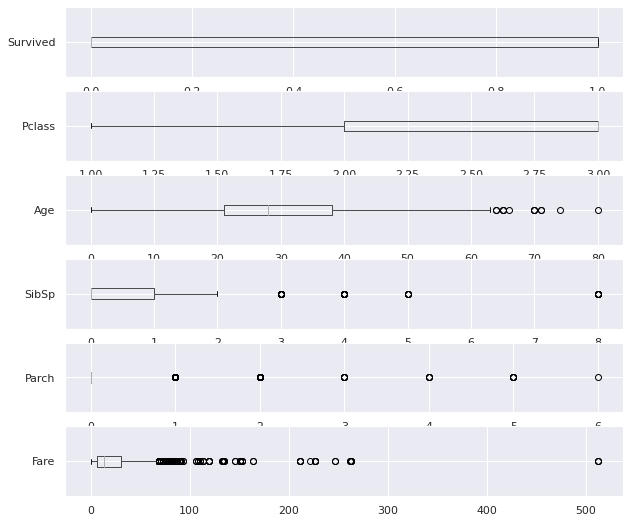

In [ ]:
# visualizing outliers using boxplot
fig, axes = plt.subplots(6, 1, figsize=(10, 9))
for i, c in enumerate(num):
  _ = df_train[[c]].boxplot(ax=axes[i], vert=False)

>Density plots

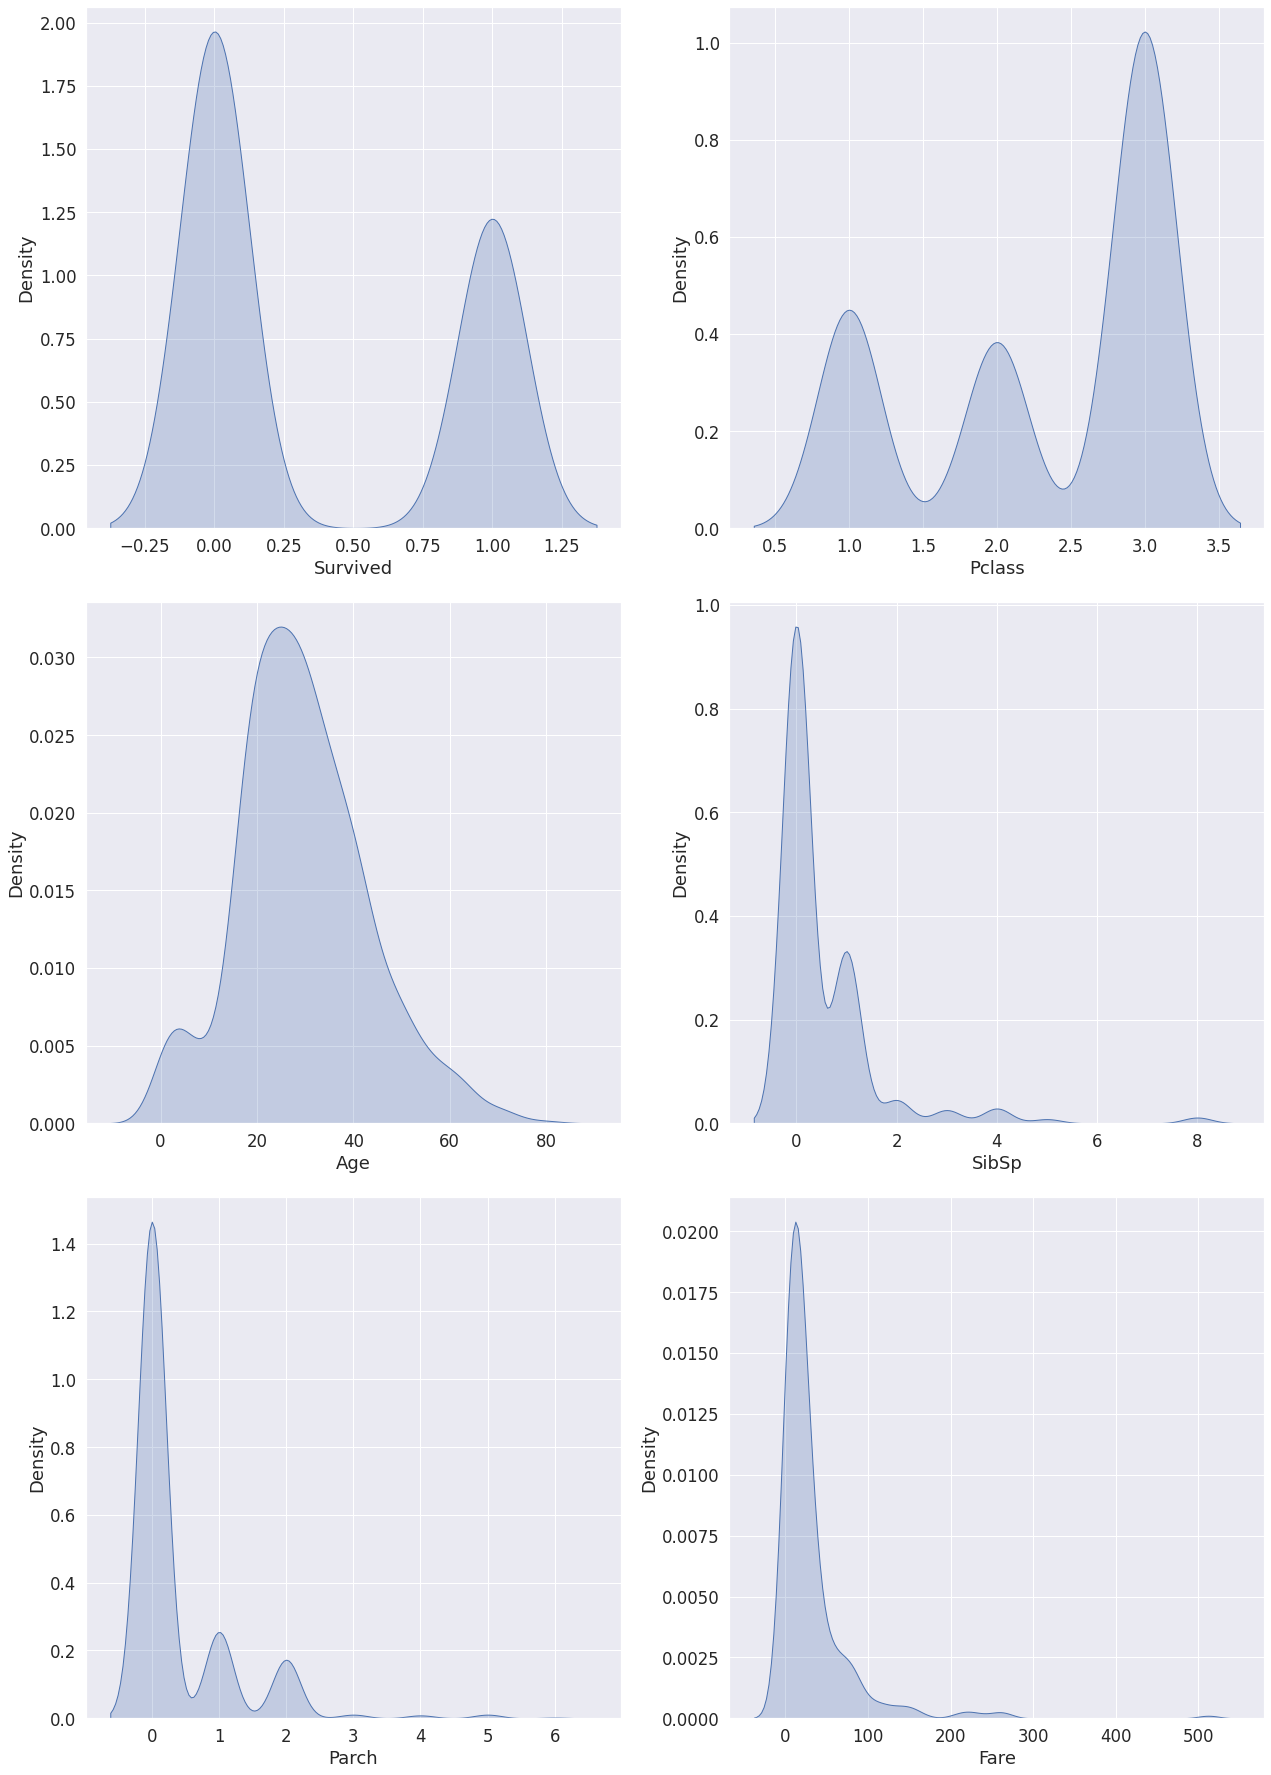

In [ ]:
# Plotting density plots to show dispersion of 
# Setting the figure size to 18 by 25
import seaborn as sns
sns.set(font_scale=1.5)
fig, axes = plt.subplots(3, 2, figsize=(18, 25))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num):
  plot = sns.kdeplot(data=df_train, x=c, ax=axes[i], fill=True)
plt.tight_layout()

>Pie chart

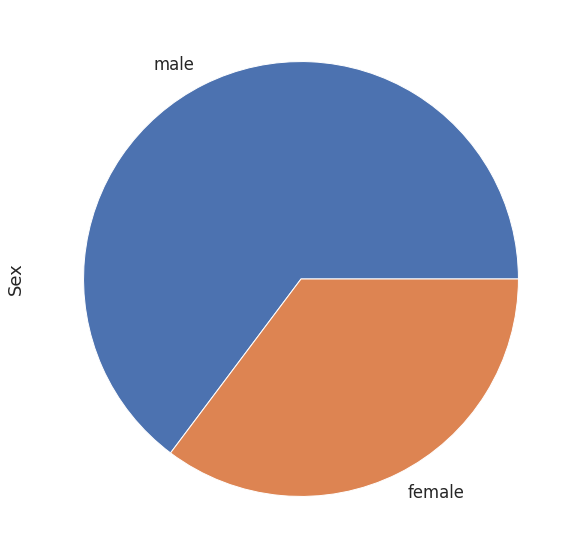

In [ ]:
#The percantage of sex
df_train.Sex.value_counts().plot(kind = 'pie',figsize = (15, 10))
plt.show()

>Histogram

male      577
female    314
Name: Sex, dtype: int64

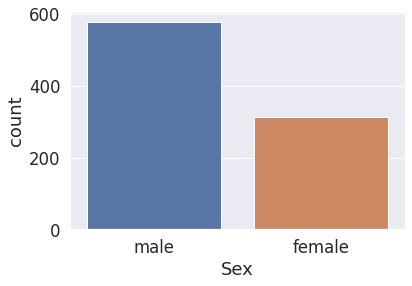

In [ ]:
#histogram
import plotly.express as px
sns.countplot(df_train["Sex"])
df_train["Sex"].value_counts()

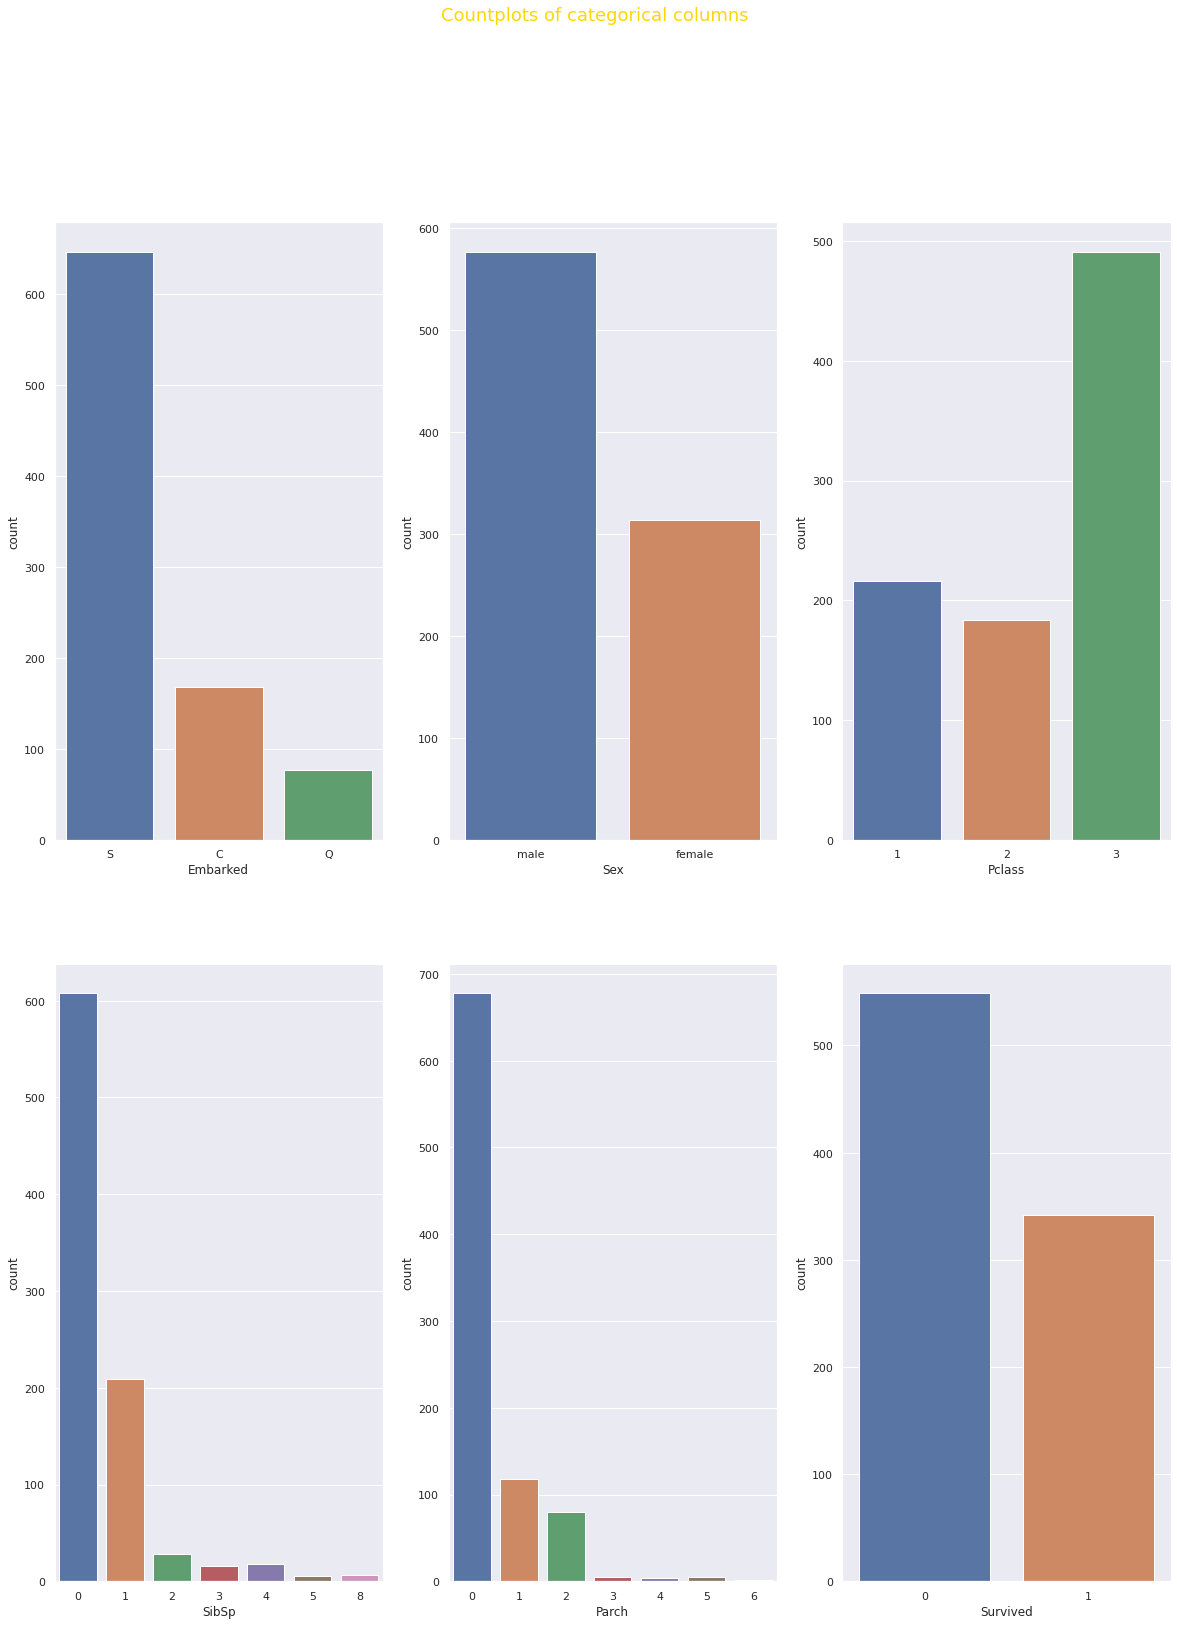

In [ ]:
# Countplot of categorical columns in the dataset
# creating a list of the categorical columns in the dataset

categorical_columns_1 =['Embarked','Sex', 'Pclass','SibSp','Parch','Survived' ]

sb.set(style = 'darkgrid', context = 'notebook')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,25))
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 1, color = 'gold')
for ax, data, column in zip(axes.flatten(), df_train, categorical_columns_1):
   sb.countplot(df_train[column], ax=ax)

In [ ]:
#polt count of survived and non servivers
fig= px.histogram(df_train, x="Survived")
fig.show()

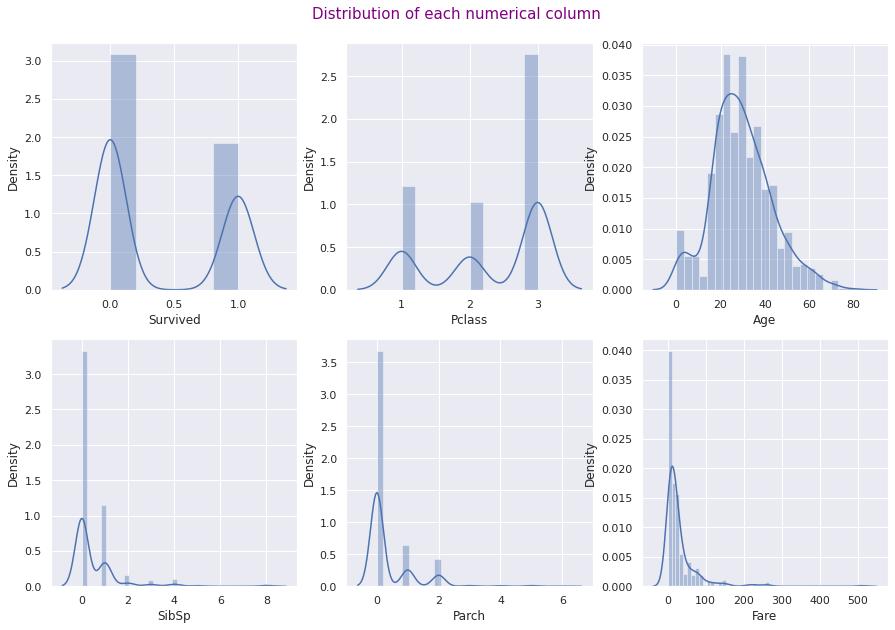

In [ ]:
#histogram
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
fig.suptitle('Distribution of each numerical column', y= 0.93, color = 'purple', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df_train, num):
  sns.distplot(df_train[name], ax = ax)

>Bivarient Analysis

>Kernel Density Plot

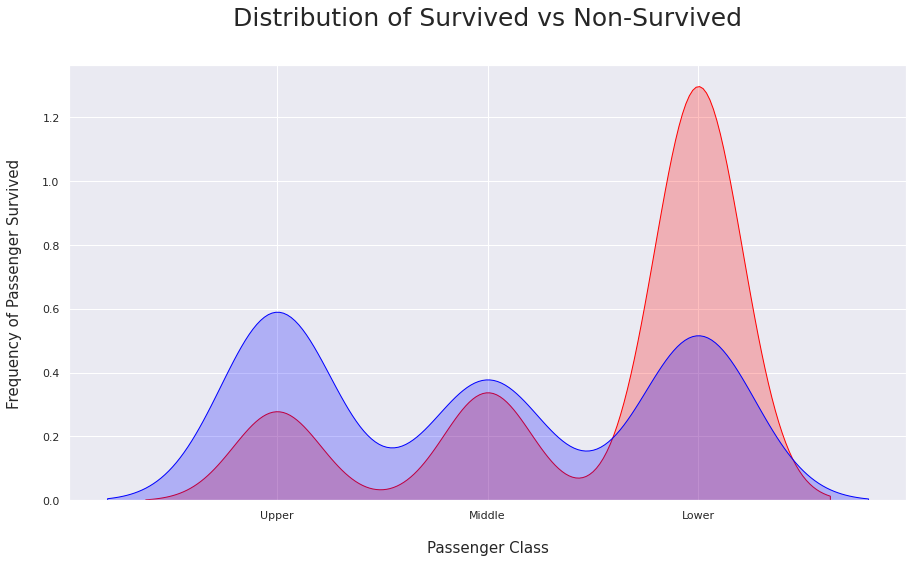

In [ ]:
# Ploting the bivariate summaries and recording our observations
#
# Kernel Density Plot Distribution of Survived vs Non-Survived
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(df_train.Pclass[df_train.Survived == 0] , 
               color='red',
               shade=True,
               label='not survived')
ax=sns.kdeplot(df_train.loc[(df_train['Survived'] == 1),'Pclass'] , 
               color='blue',
               shade=True, 
               label='survived', 
              )
plt.title('Distribution of Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(df_train.Pclass.unique()), labels);

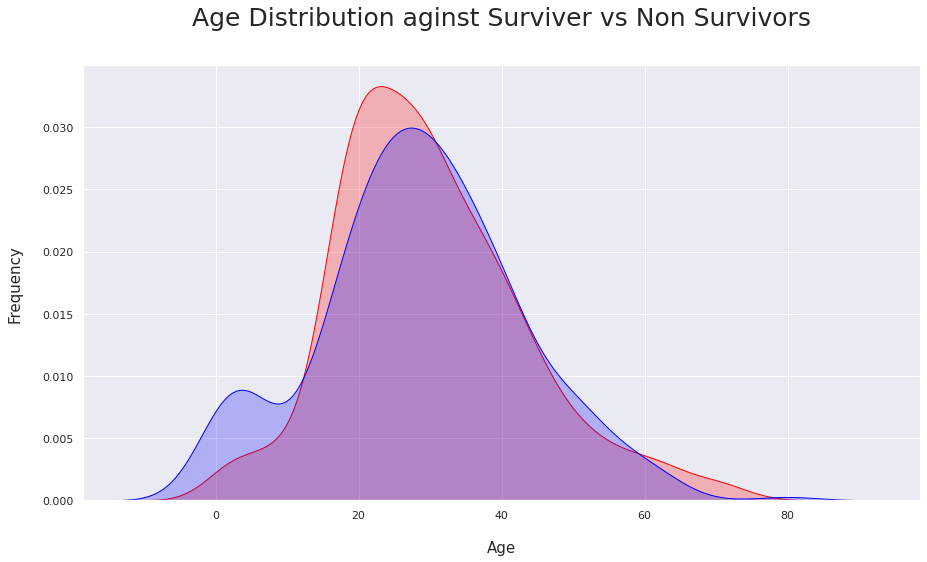

In [ ]:
# Kernel Density Plot Age Distribution aginst Surviver vs Non Survivors
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df_train.loc[(df_train['Survived'] == 0),'Age'] , color='red',shade=True,label='not survived')
ax=sns.kdeplot(df_train.loc[(df_train['Survived'] == 1),'Age'] , color='blue',shade=True, label='survived')
plt.title('Age Distribution aginst Surviver vs Non Survivors', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

>Pie Chart

In [ ]:
#plot  of survived and pclass
fig = px.pie(df_train, values="Pclass", names="Survived")
fig.show()

>Histogram 

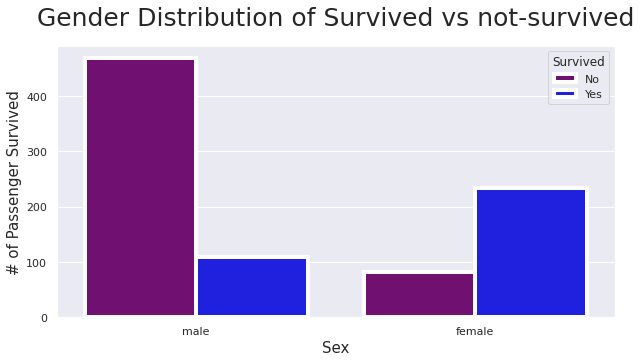

In [ ]:
# histogram Gender Distribution of Survived vs not-survived
pal = {1:"blue", 0:"purple"}
sns.set(style="darkgrid")
plt.subplots(figsize = (10,5))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = df_train, 
                   linewidth=4, 
                   palette = pal
)

## Fixing title, xlabel and ylabel
plt.title("Gender Distribution of Survived vs not-survived", fontsize = 25, pad=20)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

## 7. Feature Engineering

In [ ]:
#from cabin colum creat new column of numeric
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [df_train]

for dataset in data:
  dataset['Cabin'] = dataset['Cabin'].fillna("U0")
  dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
  dataset['Deck'] = dataset['Deck'].map(deck)
  dataset['Deck'] = dataset['Deck'].fillna(0)
  dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
df_train = df_train.drop(['Cabin'], axis=1)

In [ ]:
#sex
#convert to numeric(encode)

gender = {'male':0, 'female':1}
data = [df_train]

for dataset in data:
  dataset['Sex']= dataset['Sex'].map(gender)

In [ ]:
df_train.Name 

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
#Embarked to numeric

ports = {"S": 0, "C": 1, "Q": 2}
data = [df_train]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [ ]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71,1,3
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7,0,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53,0,3
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8,0,8


In [ ]:
#we will use name feature to extract the titles from the name, so that we can build a new feature

data = [df_train]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
  dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
  dataset['Title'] = dataset['Title'].fillna(0)
df_train = df_train.drop(['Name'], axis=1)

In [ ]:
#we will use SibSp feature to extract the titles from the SibSp, so that we can build a new feature
data=[df_train]

for dataset in data:
  dataset['relatives'] = dataset['SibSp']+dataset['Parch']
  dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
  dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
  dataset['not_alone'] = dataset['not_alone'].astype(int)

In [ ]:
# using age to creat encoding
data = [df_train]

for dataset in data:
  dataset['Age'] = dataset['Age'].astype(int)
  dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
  dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
  dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
  dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
  dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [ ]:
##we will use fare into numeric
for dataset in data:
  dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
  dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
  dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
  dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
  dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,relatives,not_alone
0,0,3,0,2,1,0,0,0,8,1,1,0
1,1,1,1,5,1,0,3,1,3,3,1,0
2,1,3,1,3,0,0,0,0,8,2,0,1
3,1,1,1,5,1,0,3,0,3,3,1,0
4,0,3,0,5,0,0,1,0,8,1,0,1


## 8. Implementing the Solution

>K-Nearest Neighbours (KNN) 80-20 Split without Linear Discriminant Analysis

In [ ]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 11), (891,), (418, 10))

In [ ]:
#  data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Training and Making Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# The final step is to make predictions on our test data
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

[[99 11]
 [17 52]]
Accuracy0.8435754189944135
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       110
           1       0.83      0.75      0.79        69

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



>K-Nearest Neighbours (KNN) 80-20 Split with Linear Discriminant Analysis

In [ ]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 11), (891,), (418, 10))

In [ ]:
#  data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#  Peforming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# Training and Making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
# Training and Making Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# The final step is to make predictions on our test data
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

[[94 16]
 [20 49]]
Accuracy0.7988826815642458
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.71      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



>K-Nearest Neighbours (KNN) 70-30 Split without Linear Discriminant Analysis




In [ ]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 11), (891,), (418, 10))

In [ ]:
#  data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Training and Making Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
# The final step is to make predictions on our test data
y_pred = classifier.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

[[147  21]
 [ 25  75]]
Accuracy0.8283582089552238
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       168
           1       0.78      0.75      0.77       100

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



>K-Nearest Neighbours (KNN) 70-30 Split with Linear Discriminant Analysis

In [ ]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 11), (891,), (418, 10))

In [ ]:
#  data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#  Peforming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# Training and Making Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
# The final step is to make predictions on our test data
y_pred = classifier.predict(X_test)

In [ ]:
#  Evaluating the Performance
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

[[144  24]
 [ 30  70]]
Accuracy0.7985074626865671
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       168
           1       0.74      0.70      0.72       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



>K-Nearest Neighbours (KNN) 60-40 Split without Linear Discriminant Analysis

In [ ]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 11), (891,), (418, 10))

In [ ]:
#  data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
# feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Training and Making Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
# The final step is to make predictions on our test data
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

[[192  29]
 [ 35 101]]
Accuracy0.8207282913165266
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       221
           1       0.78      0.74      0.76       136

    accuracy                           0.82       357
   macro avg       0.81      0.81      0.81       357
weighted avg       0.82      0.82      0.82       357



>K-Nearest Neighbours (KNN) 60-40 Split with Linear Discriminant Analysis

In [ ]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 11), (891,), (418, 10))

In [ ]:
#  data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
# feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#  Peforming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# Training and Making Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
# The final step is to make predictions on our test data
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))


[[193  28]
 [ 47  89]]
Accuracy0.7899159663865546
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       221
           1       0.76      0.65      0.70       136

    accuracy                           0.79       357
   macro avg       0.78      0.76      0.77       357
weighted avg       0.79      0.79      0.79       357





## 9. Challenging the solution

In [ ]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape
#  data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Use the LogisticRegression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X_train, y_train)
y_pred1 = log.predict(X_test)

# Use the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5, metric= "minkowski", p=2)
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)

# Use the SVC
from sklearn.svm import SVC
svc_lin =SVC(kernel="linear", random_state =0)
svc_lin.fit(X_train, y_train)
y_pred3 = svc_lin.predict(X_test)

# Use the SVC rbf
from sklearn.svm import SVC
svc_rbf =SVC(kernel="rbf", random_state =0)
svc_rbf.fit(X_train, y_train)
y_pred4 = svc_rbf.predict(X_test)

# Use the GaussianNB
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train, y_train)
y_pred5 = gauss.predict(X_test)

# Use the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree =DecisionTreeClassifier(criterion ="entropy", random_state = 0)
tree.fit(X_train, y_train)
y_pred6 = tree.predict(X_test)

# Use the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10,criterion ="entropy", random_state = 0)
forest.fit(X_train, y_train)
y_pred7 = forest.predict(X_test)


print('Logistic Regression Training Acurracy:' + str(accuracy_score(y_test, y_pred1)))
print('K Neigbour  Training Acurracy:' + str(accuracy_score(y_test, y_pred2)))
print('SVC Linear  Training Acurracy:' + str(accuracy_score(y_test, y_pred3)))
print('SVC RBF  Training Acurracy:' + str(accuracy_score(y_test, y_pred4)))
print('Gaussian Regressio  Training Acurracy:' + str(accuracy_score(y_test, y_pred5)))
print('Decision Tree  Training Acurracy:' + str(accuracy_score(y_test, y_pred6)))
print('Random Forest Training Acurracy:' + str(accuracy_score(y_test, y_pred7)))


Logistic Regression Training Acurracy:0.770949720670391
K Neigbour  Training Acurracy:0.8435754189944135
SVC Linear  Training Acurracy:0.7821229050279329
SVC RBF  Training Acurracy:0.8324022346368715
Gaussian Regressio  Training Acurracy:0.7877094972067039
Decision Tree  Training Acurracy:0.8268156424581006
Random Forest Training Acurracy:0.8268156424581006


K Neigbour has a high accuracy of 84% a better model

In [ ]:
# Importing different classification models
#
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Creating a list of classifier algorithms to compare with
#
models = [RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), DecisionTreeClassifier(), XGBClassifier(), SVC(), KNeighborsClassifier(),\
          GaussianNB(), LogisticRegression()]

# Creating lists of the algorithms, to store the accuracy scores of each fold
#
RandomForest, GradientBoosting, AdaBoost, DecisionTree, XGB, SVC, KNeighbors, GaussianNB, LogisticRegression = ([] for x in range(9))

# Creating a list containig the list of each algorithm. Created for easy iteration
#
model_list = [RandomForest, GradientBoosting, AdaBoost, DecisionTree, XGB, SVC, KNeighbors, GaussianNB, LogisticRegression]

# Spliting the data into features and the target variable
#
# Splitting our dataset
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape
# Encoding the categorical features
#


# Creating a cross validation of 10 folds
#
kfold  = KFold(n_splits=10, random_state=0)

# Iterating through each model and appending the scores of each fold to the appriopriate list
#
for i, j in zip(models, model_list):
  j.extend(list(cross_val_score(i, X, y, scoring = 'accuracy', cv = kfold)))
  
# Creating a dataframe of all the scores from the iterations for each model
#
scores = pd.DataFrame({'RandomForest': RandomForest, 'GradientBoosting': GradientBoosting, 'Adaboost': AdaBoost, 'DecisionTree': DecisionTree, 'XGB': XGB,
              'SVC': SVC, 'KNeighbors': KNeighbors, 'GaussianNB': GaussianNB, 'LogisticRegression': LogisticRegression}, index = range(1, 11))

# Calculating the mean and standard deviation score of each algorithm
#
scores.loc['mean'] = scores.mean()
scores.loc['std'] = scores.std()

# Previewing the scores dataframe
#
scores

,RandomForest,GradientBoosting,Adaboost,DecisionTree,XGB,SVC,KNeighbors,GaussianNB,LogisticRegression
1,0.788889,0.788889,0.800000,0.744444,0.811111,0.822222,0.755556,0.766667,0.788889
2,0.842697,0.876404,0.808989,0.831461,0.876404,0.842697,0.797753,0.719101,0.820225
3,0.764045,0.752809,0.786517,0.786517,0.775281,0.764045,0.775281,0.752809,0.764045
4,0.820225,0.842697,0.865169,0.797753,0.831461,0.876404,0.797753,0.797753,0.865169
5,0.831461,0.831461,0.820225,0.820225,0.865169,0.786517,0.808989,0.786517,0.786517
6,0.865169,0.842697,0.786517,0.820225,0.853933,0.831461,0.764045,0.764045,0.797753
7,0.786517,0.808989,0.775281,0.775281,0.808989,0.786517,0.797753,0.786517,0.797753
8,0.797753,0.831461,0.820225,0.808989,0.820225,0.820225,0.775281,0.775281,0.797753
9,0.865169,0.898876,0.887640,0.876404,0.887640,0.865169,0.853933,0.831461,0.876404
10,0.853933,0.831461,0.831461,0.808989,0.842697,0.820225,0.764045,0.786517,0.808989


In [ ]:
# Finding the model with the highest accuracy
#
scores.loc['mean'].idxmax()

'XGB'

In [ ]:
# Finding the model with the least variance from the mean, i.e standard deviation
#
scores.loc['std'].idxmin()

'KNeighbors'

[0.1087227  0.25781446 0.13911717 0.04135211 0.02455076 0.0956344
 0.04952063 0.07831076 0.14203256 0.04799913 0.01494531]


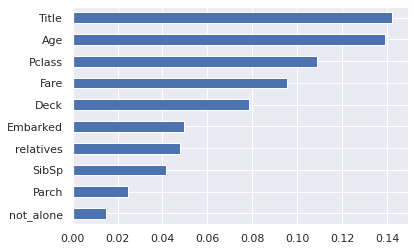

In [ ]:
#selecting the top 10 best features
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nsmallest(10).plot(kind='barh')
plt.show()

In [ ]:
df_train = df_train.drop('not_alone', axis=1)
df_train = df_train.drop('Parch', axis=1)

In [ ]:

#training random forest agian
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.98 %


After feature selection our model has improved to 92% which is a good model.

>Testing my survival using the model

In [ ]:

my_survival =[[1,	3,0,	2,	1,	0,	0,	0,	8,	1,	1]]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

pred = model.predict(my_survival_scaled)
print(pred)

if pred ==0:
  print('you did not survive')
else:
  print('Yes! You servived')

[0]
you did not survive


From the above analysis, it can be observed that the XGB is the optimal model for predicting whether Survided or did not servive.

The K-Nearest Neighbours

*   K-Nearest Neighbours 80-20 Split: accuracy of 84% 
*   K-Nearest Neighbours 70-30 Split: accuracy of 82%
*   K-Nearest Neighbours 60-40 Split: accuracy of 82%

After implementing LDA

*   K-Nearest Neighbours 80-20 Split: accuracy of 79% 
*   K-Nearest Neighbours 70-30 Split: accuracy of 79%
*   K-Nearest Neighbours 60-40 Split: accuracy of 78%

## 10. Follow up questions

### a). Did we have the right data?

Yes, the data was right to answer the prediction question

### b). Do we need other data to answer our question?

no the data was sufficient and the features were useful in modelling

### c). Did we have the right question?

yes the question was right